# Importing the libraries

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

# Importing the dataset

In [23]:
dataset = pd.read_csv('Position_Salaries.csv')
#dataset.head()
X = dataset.iloc[:, 1].values.reshape(-1,1)
y = dataset.iloc[:, -1].values.reshape(-1,1)

In [13]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [14]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

# Feature Scaling

In [24]:
# apply feature scaling both to the independent and dependent variable in SVR if the values are large
#we need two different scalar because the fit method computes the mean and standard deviation of the data
#These are different for the dependent and independednt varaibles

sc_X = StandardScaler()
X = sc_X.fit_transform(X)
sc_y = StandardScaler()
y = sc_y.fit_transform(y)

In [25]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [26]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

# Training the SVR model on the whole dataset

In [28]:
regressor = SVR(kernel= 'rbf')
regressor.fit(X,y)

c:\Users\boazm\ML(codes)\venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

# Predicting a new result

In [29]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

# Visualising the SVR results

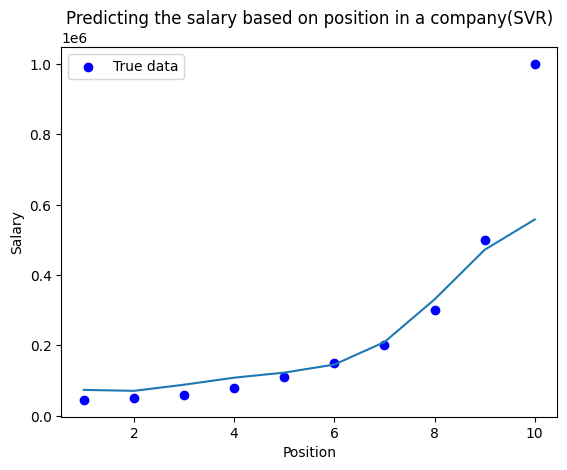

In [35]:
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y), color='blue', label='True data')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)))
plt.xlabel('Position')
plt.ylabel('Salary')
plt.title('Predicting the salary based on position in a company(SVR)')
plt.legend()
plt.show()